In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display="diagram")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
url = "https://drive.google.com/file/d/1c5210z-HSQ-Kv4EExbYIjjPq6lT0UYZW/view?usp=sharing" #housing prices iter 7
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
house = pd.read_csv(path)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Here make descirptive analysis first and explore the correlation between each variable against the price variable. I show an example below but feel free to add other numerical variables

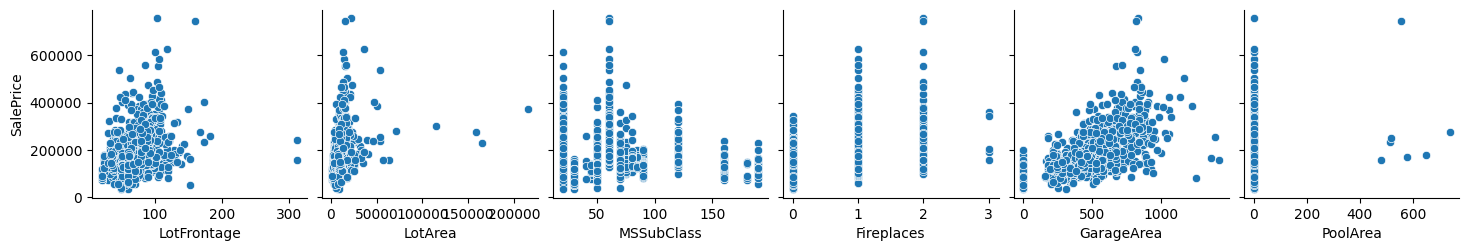

In [ ]:
sns.pairplot(data=house,
                  y_vars=['SalePrice'],
                  x_vars=['LotFrontage', 'LotArea', 'MSSubClass', 'Fireplaces', 'GarageArea', 'PoolArea'])

In [ ]:
X = house.drop(columns=['Id','SalePrice'])
y = house['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**To Know any missing Values present in our Dataset**

In [ ]:
X_train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      212
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [ ]:
X_test.isna().sum()

MSSubClass        0
MSZoning          0
LotFrontage      47
LotArea           0
Street            0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 79, dtype: int64

In [ ]:
y.isna().sum()

0

# 1. Automated Approach Using Pipelines:
### data preprocessing
1.1 impute missing values in both numerical and categorical columns

1.2. Scaling if required

1.3. categorical encoding

### Model Preparation
# 1.4. Linear Regression Model


### considering all features

In [ ]:
# Identify the numerical and categorical columns
cat_cols = X_train.select_dtypes(exclude="number").columns
num_cols = X_train.select_dtypes(include="number").columns

#create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(SimpleImputer(strategy="mean"),
                             StandardScaler())

# create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
                                SimpleImputer(strategy="constant", fill_value="N_A"),
                                OneHotEncoder(handle_unknown = 'ignore')
                              )


# Create a ColumnTransformer to apply the transformers to the appropriate columns
preprocessor = ColumnTransformer(
                              transformers=[
                                              ('num', numeric_pipe, num_cols),
                                              ('cat', categoric_pipe, cat_cols)
                              ])

# Combine the preprocessor and the model into a single pipeline
lr = LinearRegression()
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('linearregression', lr)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQ...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [ ]:
lr.coef_

array([-2.62868070e+03,  2.38499738e+03,  7.87755196e+03,  8.53269069e+03,
        5.81841823e+03,  9.78949051e+03,  2.30995296e+03,  4.94281422e+03,
        7.25504626e+03,  1.46140410e+03,  4.68930249e+02,  8.71258596e+03,
        5.82395481e+03,  1.52063294e+04,  1.10588608e+03,  1.73087772e+04,
        1.21510870e+03,  6.04318330e+02,  2.66192792e+03,  8.26374340e+02,
       -4.27089774e+03, -3.13349698e+03,  2.82640773e+03,  2.68382192e+03,
       -3.02069913e+02,  1.82679858e+03,  3.46299324e+03,  2.05981732e+03,
        1.37392536e+03,  1.28320083e+03,  5.41815771e+02,  6.33195959e+02,
        7.04636501e+03,  3.15771909e+03, -9.60243959e+02, -2.87499950e+02,
       -2.60507392e+04,  1.43498171e+04,  3.37498452e+03,  7.40272901e+03,
        9.23208591e+02, -1.57170149e+04,  1.57170149e+04,  1.22647846e+02,
       -1.38729125e+03,  1.26464340e+03, -2.77493869e+03,  2.30874351e+03,
        2.48261071e+03, -2.01641553e+03,  5.91310015e+03,  2.18201865e+03,
       -1.24346331e+04,  

In [ ]:
len(lr.coef_)

299

In [ ]:
lr.intercept_

-23759.54619024796

### Calculate RMSE:

In [ ]:
# Make predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluate the model using RMSE
train_rmse_lr = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_lr = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Linear Regression model with all features -Train set RMSE value: {train_rmse_lr:.2f}")
print(f"Linear Regression model with all feature- Test set with RMSE value: {test_rmse_lr:.2f}")

Linear Regression model with all features -Train set RMSE value: 18355.96
Linear Regression model with all feature- Test set with RMSE value: 58815.43


# 2. Automated Approach Using Pipelines:
### data preprocessing
2.1 impute missing values in both numerical and categorical columns

2.2. Scaling if required

2.3. categorical encoding

### Model Preparation
# 2.4. Decision Tree Regressor
2.5. finding best aparameters of our model using GridSearchCV

### considering all features

In [ ]:
# Identify the numerical and categorical columns
cat_cols = X_train.select_dtypes(exclude="number").columns
num_cols = X_train.select_dtypes(include="number").columns

#create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(SimpleImputer(strategy="mean"),
                             StandardScaler())

# create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
                                SimpleImputer(strategy="constant", fill_value="N_A"),
                                OneHotEncoder(handle_unknown = 'ignore')
                              )


# Create a ColumnTransformer to apply the transformers to the appropriate columns
preprocessor = ColumnTransformer(
                              transformers=[
                                              ('num', numeric_pipe, num_cols),
                                              ('cat', categoric_pipe, cat_cols)
                              ])

# Combine the preprocessor and the model into a single pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('decisiontreeregressor', DecisionTreeRegressor())
])

param_grid = {
    'decisiontreeregressor__criterion':['squared_error','friedman_mse', 'absolute_error', 'poisson'],
    'decisiontreeregressor__max_depth': range(3, 10, 2),
    'decisiontreeregressor__min_samples_split': range(10, 40, 5),
    'decisiontreeregressor__min_samples_leaf': range(9, 30, 2)
    }

search = GridSearchCV(pipeline, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      verbose=1) # we want informative outputs during the training process

search.fit(X_train, y_train)

Fitting 5 folds for each of 1056 candidates, totalling 5280 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF'...
      dtype='object'))])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__criterion': ['squared_error',
                                                              'friedman_mse',
                                                              'absolute_error',
                                                              'poisson'],
                         'decisiontreeregressor__max_depth': range(3, 10, 2),
                         'decisiontreeregressor__min_samples_leaf': range(9, 30, 2),
                         'decisiontreeregressor__min_samples_split': range(10, 40, 5)},
             verbose=1)

In [ ]:
search.best_params_

{'decisiontreeregressor__criterion': 'poisson',
 'decisiontreeregressor__max_depth': 9,
 'decisiontreeregressor__min_samples_leaf': 17,
 'decisiontreeregressor__min_samples_split': 20}

### Calculate RMSE:

In [ ]:
# Make predictions
y_train_pred = search.predict(X_train)
y_test_pred = search.predict(X_test)

# Evaluate the model using RMSE
train_rmse_dt = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_dt = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Linear Regression model with all features -Train set RMSE value: {train_rmse_dt:.2f}")
print(f"Linear Regression model with all feature- Test set with RMSE value: {test_rmse_dt:.2f}")

Linear Regression model with all features -Train set RMSE value: 29695.34
Linear Regression model with all feature- Test set with RMSE value: 39548.70


### Which is better model? LinearRegression  or  DecisionTreeRegressor?

In [ ]:
print("RMSE Evolution:")
print("-" * 30)
print(f"1. Linear Regreesion  Model: \n\tTrain RMSE: {train_rmse_lr:.2f}\n\tTest RMSE: {test_rmse_lr:.2f}")
print("-" * 30)
print(f"2. Decision Tree Regression Model : \n\tTrain RMSE: {train_rmse_dt:.2f}\n\tTest RMSE: {test_rmse_dt:.2f}")

RMSE Evolution:
------------------------------
1. Linear Regreesion  Model: 
	Train RMSE: 18355.96
	Test RMSE: 58815.43
------------------------------
2. Decision Tree Regression Model : 
	Train RMSE: 29695.34
	Test RMSE: 39548.70
